# Simple Linear Regression

## 1.Linear regression
- Linear regression은 종속 변수 $y$와 한개 이상의 독립 변수 $X$와의 선형 관계를 모델링
- 독립 변수 : Input Data
- 종속 변수 : 독립 변수에 의해 영향을 받는 변수(Label)

- 선형 관계의 modeling은 1차로 이루어진 직선을 구하는 것
- Input와 Label 데이터의 관계를 가장 잘 설명하는 최적의 직선을 찾아냄으로써 독립 변수와 종속 변수 사이의 관계를 도출해 내는 과정

# simple linear regression
- 독립 변수가 1개인 simple linear regression example
- 변수가 하나인 직선 $$f(x_i) = wx_i + b$$


<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/residuals.png
" width="400" height="300" />



- Goal : 예측한 값과 실제 데이터가 가장 비슷한 직선을 찾는것
- model 이 예측한 값 : $f(x_i)$
- 실제 데이터 : $y$ 입니다.  

- Cost Function
    - 실제 데이터(위 그림에서 빨간 점) 과 직선 사이의 차이를 줄이는 것이 우리의 목적 
$$\text{cost function} = \frac{1}{N}\sum_{i=1}^n (y_i - f(x_i))^2$$


- cost function을 최소로 하는 $w$와 $b$를 찾아보자. 
- 이차함수의 최솟값을 구하는 방법은? 

### 1-1. 미분

다음 식의 최솟값을 어떻게 찾을 수 있을까? 
$$f(w) = w^2 + 3w -5$$

- 미분한 값이 0이 되는 지점 -> 최솟값이 되는 지점 (왜?) 

In [38]:
# SymPy : 기호 계산을 위한 오픈 소스 Python 라이브러리

In [39]:
# !pip install sympy

In [40]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline
sympy.init_printing()

In [41]:
x = sympy.Symbol("x", real= True)

f = x**2 + 1*x -6
f

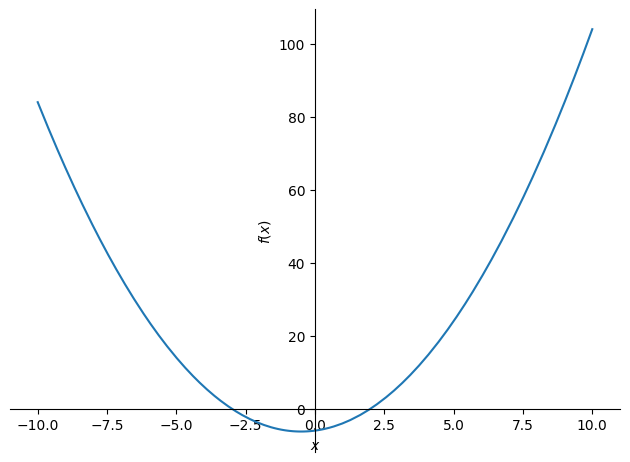

In [42]:
sympy.plotting.plot(f)

In [43]:
# 1차 미분

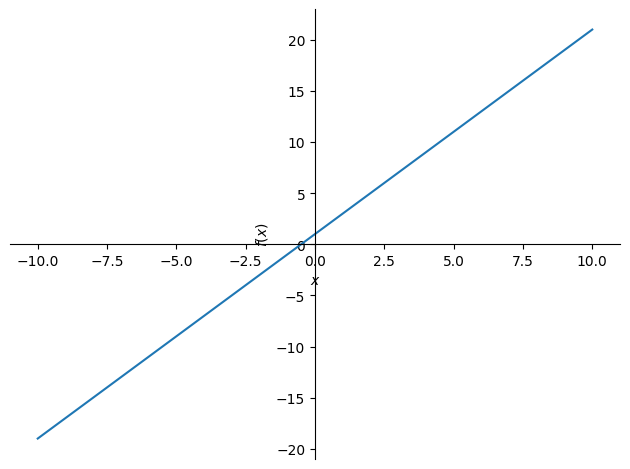

In [44]:
fprime = f.diff(x)
fprime
sympy.plotting.plot(fprime)

In [45]:
# 1차 미분식의 해
sympy.solve(fprime, x)

In [47]:
fp_num = sympy.lambdify(x, fprime)

In [48]:
x = 5
for i in range(100):
    x = x - fp_num(x)*0.1

In [49]:
print(x)

-0.4999999988796302


### 1-2.Gradient Descent
- Gradient Descent 구현

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/descent.png
" width="400" height="300" />


- 1-1와 1-2의 결과를 비교해 보자 
- Gradient descent 방법을 실제 데이터에 적용 

### 1-3.Linear regression

In [50]:
import numpy as np

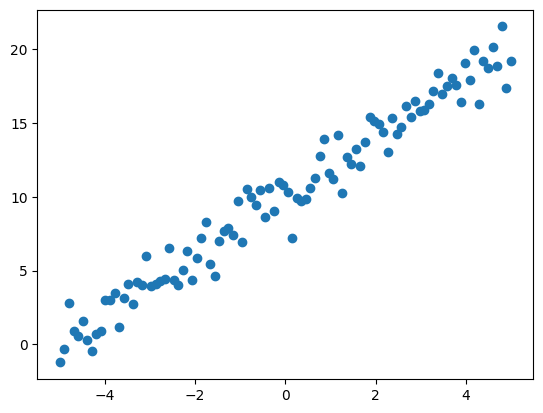

In [51]:
x_data = np.linspace(-5, 5, 100) # 정규분포에서 난수 생성후 10을 곱해줌
weight_1 = 2
weight_0 = 10
y_data = weight_1 * x_data + weight_0 + np.random.normal(size=100) 

# x에 2를 곱한다음 + 편향10 + 난수를 더해준다(noise)
# y = 2 * x + 10 # 기울기가 2인 직선 편향이 10

pyplot.scatter(x_data,y_data)

In [67]:
# costfunction

w_1, x, w_0, y = sympy.symbols("w_1 x w_0 y")
# cost_function = (weight_1 * x_data + weight_0 - y_data) ** 2
cost_function = (w_1 * x + w_0 - y) ** 2

In [68]:
cost_function

In [69]:
# 기울기 함수 정의
grad_w_0 = sympy.lambdify([w_1, x, w_0, y], cost_function.diff(w_0), "numpy")
grad_w_1 = sympy.lambdify([w_1, x, w_0, y], cost_function.diff(w_1), "numpy")

In [71]:
grad_w_0


<function _lambdifygenerated(w_1, x, w_0, y)>

In [98]:
# w_0, w_1 의 초기값 지정
w_0 = 10.0
w_1 = 10.0

for i in range(100000):
    descent_w_0 = numpy.sum(grad_w_0(w_1, w_0, x_data, y_data))/len(x_data)
    descent_w_1 = numpy.sum(grad_w_1(w_1, w_0, x_data, y_data))/len(x_data)
    w_0 = w_0-descent_w_0*0.01
    w_1 = w_1-descent_w_1*0.01


In [100]:
print(w_0)
print(w_1)

9.424216288078721
1.067520464478325


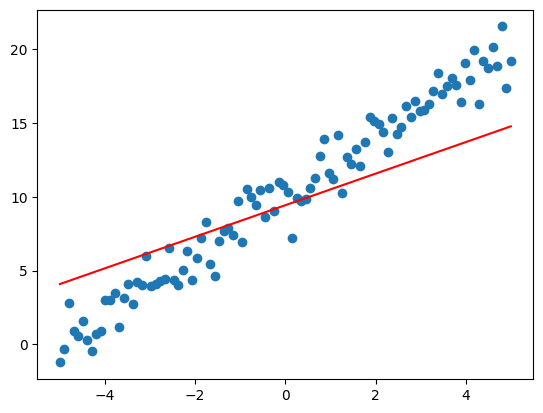

In [101]:
pyplot.scatter(x_data,y_data)
pyplot.plot(x_data, w_1*x_data + w_0, '-r');

In [ ]:
# linear regression 을 이용해 지구 온도변화를 예측해 보세요 
# https://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD
# 1. 연도에 따른 데이터 상승을 그래프로 확인하세요
# 2. sklearn을 이용해 linear 그래프를 예측해 보세요 
# 메일로 전송

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
url = "https://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD"
data = pd.read_csv(url)

In [5]:
data

,Global Land Temperature Anomalies,January-December
0,Units: Degrees Celsius,NaN
1,Base Period: 1901-2000,NaN
2,Missing: -999.0000,NaN
3,Year,Value
4,1880,-0.47
...,...,...
136,2012,0.92
137,2013,1.01
138,2014,1.02
139,2015,1.35


In [6]:
data = pd.read_csv(url, header=4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    137 non-null    int64  
 1   Value   137 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


In [12]:
data.isnull().sum()

Year     0
Value    0
dtype: int64

In [13]:
x_data = data.Year
y_data = data.Value

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_vaild, y_train, y_vaild = train_test_split(x_data, y_data, test_size =0.2)

In [25]:
x_train = x_train.values.reshape((-1,1))

In [26]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
# fit_intercept : 상수항 유무 판단 
# y 절편

LinearRegression()

In [28]:
x_vaild = x_vaild.values.reshape((-1,1))

In [29]:
y_vaild_predict = model.predict(x_vaild)

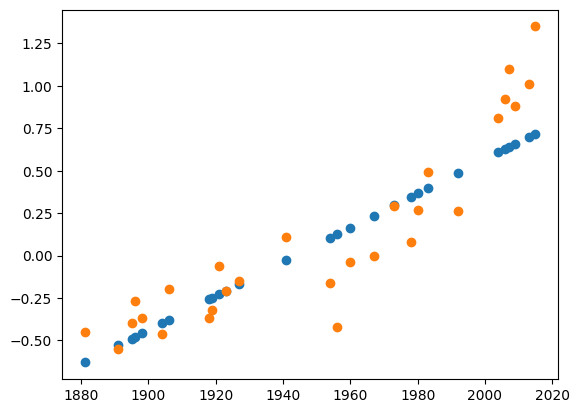

In [39]:
plt.scatter(x_vaild,y_vaild_predict)
plt.scatter(x_vaild,y_vaild)